# LA LIGA DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
with sqlite3.connect("../laliga.sqlite") as con:
    df = pd.read_sql("""SELECT * FROM Matches""", con = con)
	


In [3]:
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


## EJERCICIO 1

In [4]:
num_valores_none = df["score"].isna().sum()
num_valores_none

780

Taking into account that the number of cells without score is 1.6% we decided to work with another data frame without this values.

In [5]:
df_clean = df.dropna(subset = ["score"]).copy()
df_clean

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0


In [6]:
df_clean[['score_home', 'score_visitor']] = df_clean['score'].str.split(':', expand=True)
df_clean

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2
...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0


In [7]:
df_clean.dtypes

season           object
division          int64
matchday          int64
date             object
time             object
home_team        object
away_team        object
score            object
score_home       object
score_visitor    object
dtype: object

In [8]:
df_clean['score_home'] = pd.to_numeric(df_clean['score_home']).astype(int)
df_clean['score_visitor'] = pd.to_numeric(df_clean['score_visitor']).astype(int)

In [9]:
df_clean.dtypes

season           object
division          int64
matchday          int64
date             object
time             object
home_team        object
away_team        object
score            object
score_home        int32
score_visitor     int32
dtype: object

In [10]:
df_clean['result'] = "None"
df_clean.loc[df_clean['score_home'] > df_clean['score_visitor'], 'result'] = "Home"
df_clean.loc[df_clean['score_home'] < df_clean['score_visitor'], 'result'] = "Visitor"
df_clean.loc[df_clean['score_home'] == df_clean['score_visitor'], 'result'] = "Tie"
df_clean

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,3,Visitor
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,3,2,Home
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,5,0,Home
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,1,1,Tie
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,0,2,Visitor
...,...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,8/28/21,10:00 PM,Ponferradina,Girona,2:1,2,1,Home
48346,2021-2022,2,3,8/29/21,5:00 PM,SD Amorebieta,UD Almería,2:1,2,1,Home
48347,2021-2022,2,3,8/29/21,7:30 PM,CD Lugo,Real Valladolid,0:2,0,2,Visitor
48348,2021-2022,2,3,8/29/21,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,0,0,Tie


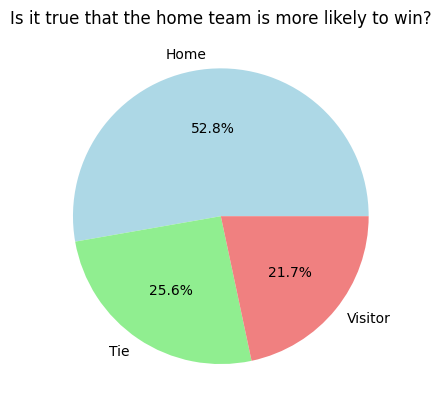

In [11]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
grafico = df_clean['result'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
grafico.set_ylabel('')
grafico.set_title('Is it true that the home team is more likely to win?')
plt.show()

## EJERCICIO2

In [12]:
home_goals = df_clean.loc[df_clean['division'] == 1].groupby('home_team')['score_home'].sum()
away_goals = df_clean.loc[df_clean['division'] == 1].groupby('away_team')['score_visitor'].sum()
total_goals = home_goals.add(away_goals, fill_value=0)
TOP_total_goals = total_goals.sort_values(ascending=False).head(10)

In [13]:
home_goals_conceded = df_clean.loc[df_clean['division'] == 1].groupby('home_team')['score_visitor'].sum()
away_goals_conceded = df_clean.loc[df_clean['division'] == 1].groupby('away_team')['score_home'].sum()
total_goals_conceded = home_goals_conceded.add(away_goals_conceded, fill_value=0)
TOP_total_goals_conceded = total_goals_conceded.sort_values(ascending=False).head(10)

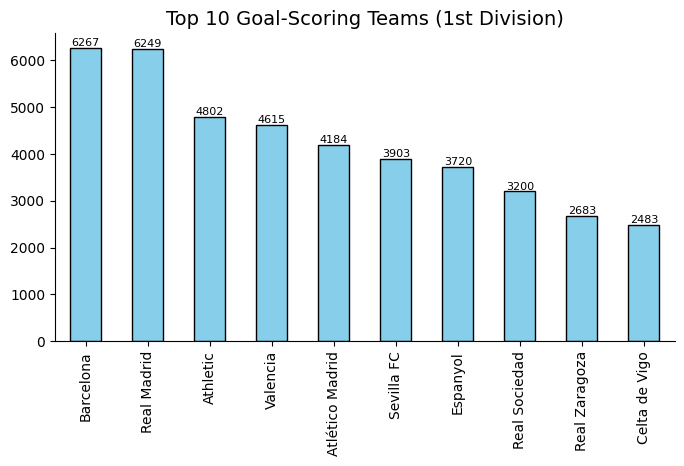

In [14]:
figure_1, axes_1 = plt.subplots(figsize=(8, 4))
TOP_total_goals.plot(kind='bar', ax=axes_1, color='skyblue', edgecolor='black')

plt.title('Top 10 Goal-Scoring Teams (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals):
    axes_1.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_1.spines['top'].set_visible(False)
axes_1.spines['right'].set_visible(False)

plt.show()


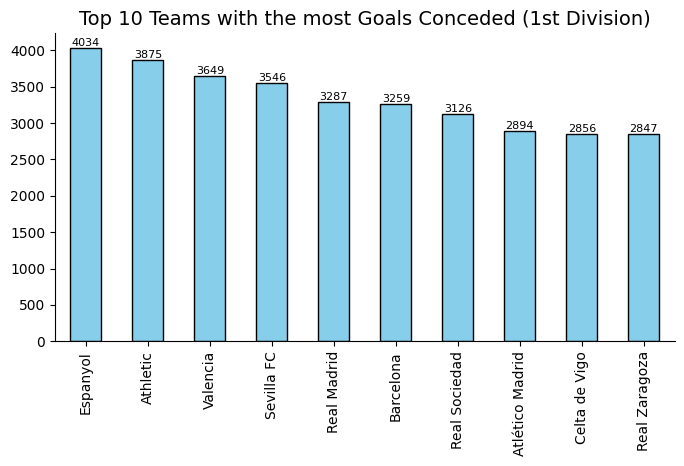

In [15]:
figure_2, axes_2 = plt.subplots(figsize=(8, 4))
TOP_total_goals_conceded.plot(kind='bar', ax=axes_2, color='skyblue', edgecolor='black')

plt.title('Top 10 Teams with the most Goals Conceded (1st Division)', fontsize=14)
plt.ylabel('')
plt.xlabel('')

for i, v in enumerate(TOP_total_goals_conceded):
    axes_2.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=8)

axes_2.spines['top'].set_visible(False)
axes_2.spines['right'].set_visible(False)

plt.show()

In [16]:
df_clean['goal_difference'] = abs(df_clean['score_home'] - df_clean['score_visitor']).astype(int)
highest_goal_dif = df_clean[df_clean['division'] == 1].sort_values('goal_difference', ascending = False).head(10)
highest_goal_dif

,season,division,matchday,date,time,home_team,away_team,score,score_home,score_visitor,result,goal_difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,12,1,Home,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,11,1,Home,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,10,0,Home,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,10,0,Home,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,10,0,Home,10
3629,1953-1954,1,26,3/28/54,None,Barcelona,Real Oviedo,9:0,9,0,Home,9
10024,1978-1979,1,16,1/14/79,None,Barcelona,Rayo Vallecano,9:0,9,0,Home,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,9,0,Home,9
5027,1959-1960,1,21,2/7/60,None,Real Madrid,Elche CF,11:2,11,2,Home,9
3911,1955-1956,1,1,9/11/55,None,Atlético Madrid,Hércules CF,9:0,9,0,Home,9


## EJERCICIO 3

In [17]:
df_ex3 = df_clean.copy()
df_ex3['date'] = pd.to_datetime(df_clean['date'], format = "%m/%d/%y")
df_ex3['weekday'] = df_ex3['date'].dt.isocalendar().day

df_ex3_seasons1 = df_ex3[df_ex3['season'] == '2000-2001']
df_ex3_seasons2 = df_ex3[df_ex3['season'] == '2020-2021']

df_seasons1_weekday = df_ex3_seasons1.groupby('weekday')['weekday'].count().reset_index(name='conteo')
df_seasons2_weekday = df_ex3_seasons2.groupby('weekday')['weekday'].count().reset_index(name='conteo')

df_ex3_seasons1["time"].isna().sum()/len(df_ex3_seasons1)

df_ex3_seasons2["time"].isna().sum()/len(df_ex3_seasons2)

0.0011876484560570072

I calculated how many missing values we have in the column time in the two seasons we are observing, in the season 2000-2001 we are missing 55% of the data and in season 2020-2021 we are only missing 0.11% of the data. Clearly in the first season, the amount of matches we have with no set time is very large and more than half of the whole dataset. For what is asked in this exercise it is better to not include these values for the histogram of the time, since we don't have values and if I would make a bar for the None values, for the first season at least, it would be abnormally tall compared to the others and ruin our visualization and what we are trying to analyze.  

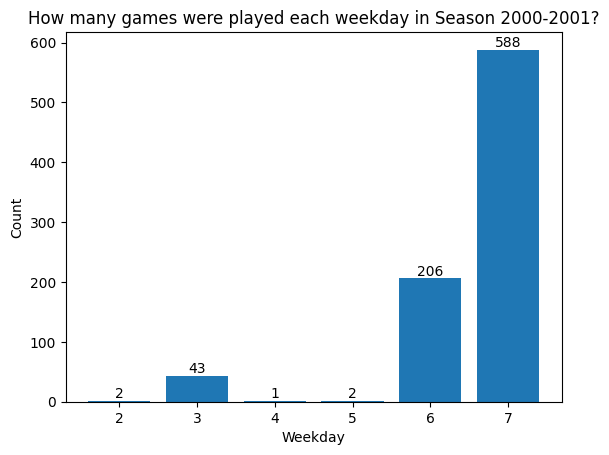

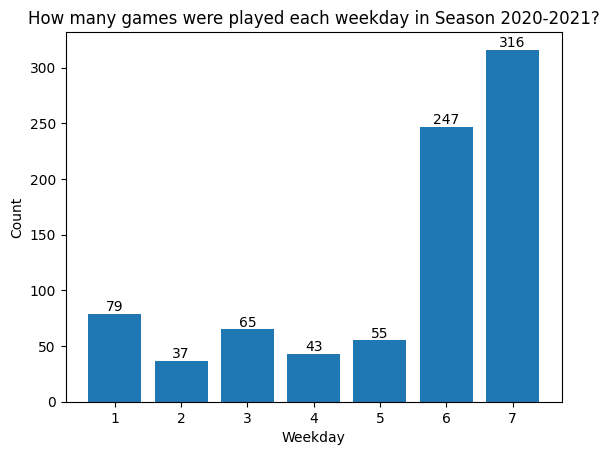

In [18]:
df_seasons1_time = df_ex3_seasons1.dropna(subset = ["time"]).copy()
df_seasons2_time = df_ex3_seasons2.dropna(subset = ["time"]).copy()

df_seasons1_time = df_ex3_seasons1.groupby('time')['time'].count().reset_index(name='conteo')
df_seasons2_time = df_ex3_seasons2.groupby('time')['time'].count().reset_index(name='conteo')

# Assuming you have a DataFrame 'df'
x_values = df_seasons1_weekday['weekday']
y_values = df_seasons1_weekday['conteo']

plt.bar(x_values, y_values)

for x, y in zip(x_values, y_values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('How many games were played each weekday in Season 2000-2001?')
plt.show()

# Assuming you have a DataFrame 'df'
x_values = df_seasons2_weekday['weekday']
y_values = df_seasons2_weekday['conteo']

plt.bar(x_values, y_values)

for x, y in zip(x_values, y_values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('How many games were played each weekday in Season 2020-2021?')
plt.show()


We can observe that in the earlier seasons, the games were mainly played on the weekends (weekday 6 and 7) and then in the later seasons they are more spreadout through the week. Obviously it is still concentrated on the weekends, being Sunday the most busy day but at least there are many games played during the week as well.

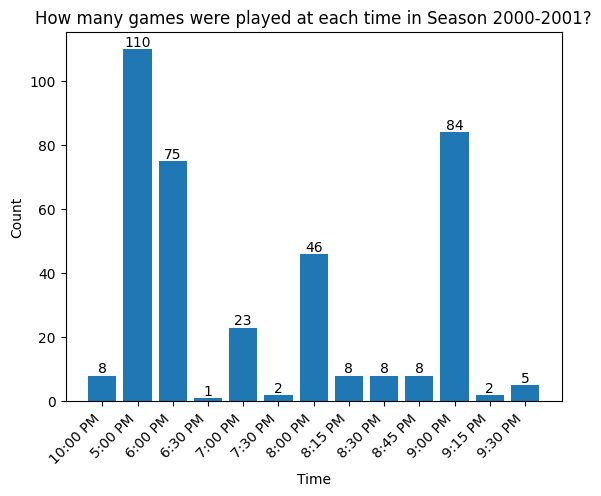

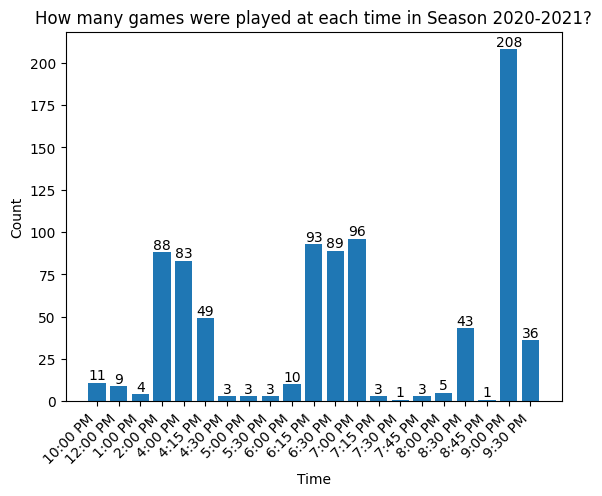

In [19]:
x_values = df_seasons1_time['time']
y_values = df_seasons1_time['conteo']

plt.bar(x_values, y_values)
plt.xticks(rotation=45, ha='right')

for x, y in zip(x_values, y_values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('How many games were played at each time in Season 2000-2001?')
plt.show()

# Assuming you have a DataFrame 'df'
x_values = df_seasons2_time['time']
y_values = df_seasons2_time['conteo']

plt.bar(x_values, y_values)
plt.xticks(rotation=45, ha='right')

for x, y in zip(x_values, y_values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('How many games were played at each time in Season 2020-2021?')
plt.show()


We can observe that in both seasons, the games are pretty spreadout, but the difference here is that there are many more times in the later seasons. So at first we can think that in both seasons, the games are spreadout but then seeing the x axis more clearly, there are a lot more values than in the first seasons which means there are more times. This means that the games are more spread out during the day since there are more slots for games in the later seasons.

## Ejercicio 5

In [20]:
df_confrontations = df_clean[(df_clean['home_team'].isin(['Barcelona', 'Real Madrid'])) & (df_clean['away_team'].isin(['Barcelona', 'Real Madrid']))]

barcelona_wins = len(df_confrontations[(df_confrontations['home_team'] == 'Barcelona') & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == 'Barcelona') & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])

real_madrid_wins = len(df_confrontations[(df_confrontations['home_team'] == 'Real Madrid') & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                       df_confrontations[(df_confrontations['away_team'] == 'Real Madrid') & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])

barcelona_madrid_ties = len(df_confrontations[(df_confrontations['home_team'] == 'Barcelona') & (df_confrontations['score_home'] == df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == 'Barcelona') & (df_confrontations['score_home'] == df_confrontations['score_visitor'])])


In [21]:
barcelona_goals = df_confrontations[(df_confrontations['home_team'] == 'Barcelona')]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == 'Barcelona')]['score_visitor'].astype(int).sum()
real_madrid_goals = df_confrontations[(df_confrontations['home_team'] == 'Real Madrid')]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == 'Real Madrid')]['score_visitor'].astype(int).sum()


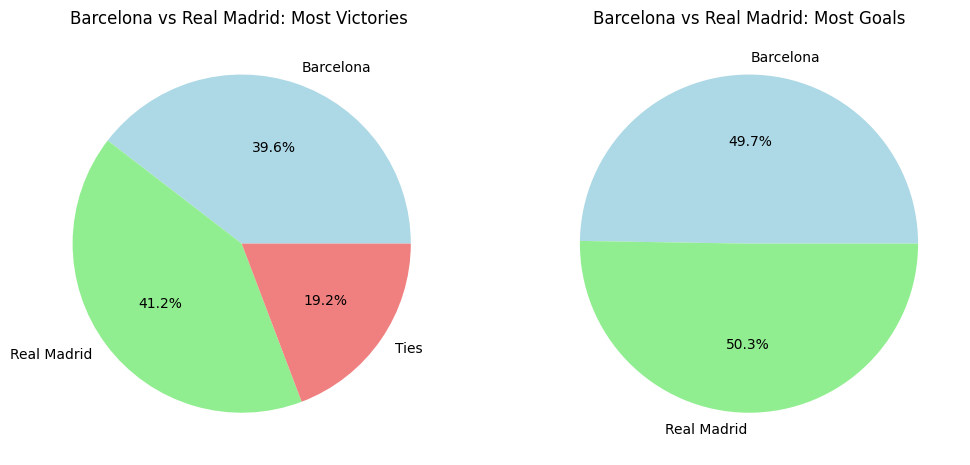

In [22]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
figure_3, axes_3 = plt.subplots(1, 2, figsize=(12, 6))

axes_3[0].pie([barcelona_wins, real_madrid_wins, barcelona_madrid_ties], labels=['Barcelona', 'Real Madrid', 'Ties'], autopct='%1.1f%%', colors=colors)
axes_3[0].set_title('Barcelona vs Real Madrid: Most Victories ')

axes_3[1].pie([barcelona_goals, real_madrid_goals], labels=['Barcelona', 'Real Madrid'], autopct='%1.1f%%',colors=colors)
axes_3[1].set_title('Barcelona vs Real Madrid: Most Goals')

plt.show()


In [23]:
def plot_direct_confrontations_stats(team1, team2):
    df_confrontations = df_clean[(df_clean['home_team'].isin([team1, team2])) & (df_clean['away_team'].isin([team1, team2]))]

    team1_wins = len(df_confrontations[(df_confrontations['home_team'] == team1) & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == team1) & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])
    team2_wins = len(df_confrontations[(df_confrontations['home_team'] == team2) & (df_confrontations['score_home'] > df_confrontations['score_visitor'])] +
                       df_confrontations[(df_confrontations['away_team'] == team2) & (df_confrontations['score_home'] < df_confrontations['score_visitor'])])
    team1_team2_ties = len(df_confrontations[(df_confrontations['home_team'] == team1) & (df_confrontations['score_home'] == df_confrontations['score_visitor'])] +
                     df_confrontations[(df_confrontations['away_team'] == team1) & (df_confrontations['score_home'] == df_confrontations['score_visitor'])])

    team1_goals = df_confrontations[(df_confrontations['home_team'] == team1)]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == team1)]['score_visitor'].astype(int).sum()
    team2_goals = df_confrontations[(df_confrontations['home_team'] == team2)]['score_home'].astype(int).sum() + df_confrontations[(df_confrontations['away_team'] == team2)]['score_visitor'].astype(int).sum()

    colors = ['lightblue', 'lightgreen', 'lightcoral']
    figure, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].pie([team1_wins, team2_wins, team1_team2_ties], labels=[team1, team2, 'Ties'], autopct='%1.1f%%', colors=colors)
    axes[0].set_title(team1 + ' vs ' + team2 + ': Most Victories')

    axes[1].pie([team1_goals, team2_goals], labels=[team1, team2], autopct='%1.1f%%', colors=colors)
    axes[1].set_title(team1 + ' vs ' + team2 + ': Most Goals')

    plt.show()
    return 


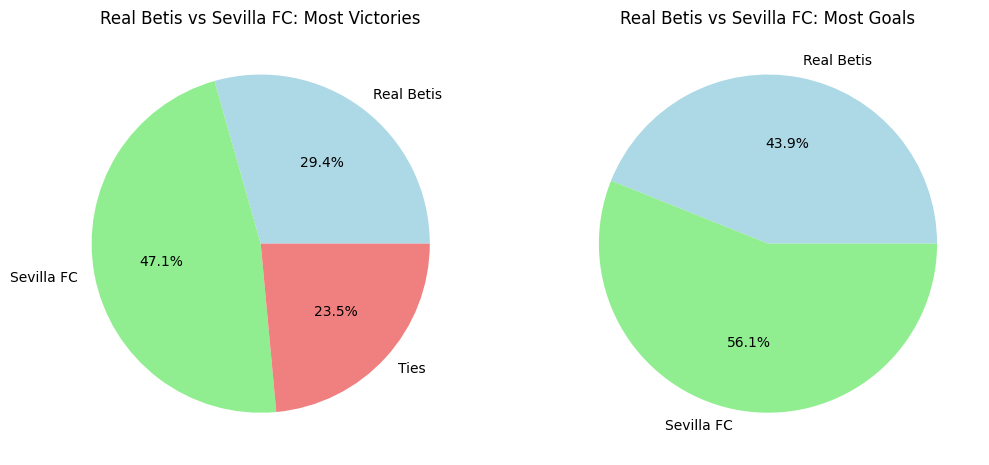

In [24]:
plot_direct_confrontations_stats('Real Betis', 'Sevilla FC')

## EJERCICIO 7

In [26]:
df_ex7 = df_clean.copy()
#this season was incomplete
df_ex7 = df_ex7[df_ex7['season'] != '2021-2022']
df_ex7['goal_difference_home'] = df_ex7['score_home'] - df_ex7['score_visitor']
df_ex7['goal_difference_away'] = df_ex7['score_visitor'] - df_ex7['score_home']

df_ex7_home = df_ex7[['season', 'division', 'home_team', 'score_home', 'score_visitor', 'result', 'goal_difference_home']]
df_ex7_away = df_ex7[['season', 'division', 'away_team', 'score_home', 'score_visitor', 'result', 'goal_difference_away']]

#default value
df_ex7_home['rank_points'] = 1
df_ex7_home.loc[df_ex7_home['result'] == 'Home', 'rank_points'] = 3
df_ex7_home.loc[df_ex7_home['result'] == 'Visitor', 'rank_points'] = 0

#default value
df_ex7_away['rank_points'] = 1 
df_ex7_away.loc[df_ex7_away['result'] == 'Home', 'rank_points'] = 0
df_ex7_away.loc[df_ex7_away['result'] == 'Visitor', 'rank_points'] = 3

df_ex7_home['goals_conceded'] = df_ex7_home['score_visitor']
df_ex7_home['goals_scored'] = df_ex7_home['score_home']
df_ex7_away['goals_conceded'] = df_ex7_home['score_home']
df_ex7_away['goals_scored'] = df_ex7_home['score_visitor']

df_ex7_home['wins'] = 0
df_ex7_home['loses'] = 0
df_ex7_home['ties'] = np.where(df_ex7_home['result'] == 'Tie', 1, 0)
df_ex7_away['wins'] = 0
df_ex7_away['loses'] = 0
df_ex7_away['ties'] = np.where(df_ex7_away['result'] == 'Tie', 1, 0)

for index, row in df_ex7_home.iterrows():
    if row['result'] != 'Tie':
        if row['result'] == 'Home':
            df_ex7_home.loc[index, 'wins'] = 1
        elif row['result'] == 'Visitor':
            df_ex7_home.loc[index, 'loses'] = 1

for index, row in df_ex7_away.iterrows():
    if row.result != 'Tie':
        if row.result == 'Visitor':
            df_ex7_home.loc[index, 'wins'] = 1
        elif row.result == 'Home':
            df_ex7_home.loc[index, 'loses'] = 1


df_ex7_home = df_ex7_home.rename(columns={'home_team': 'team', 'goals_scored': 'GF', 'goals_conceded': 'GA', 'goal_difference_home': 'GD', 'wins': 'W', 'loses': 'L', 'ties': 'T', 'rank_points': 'Pts' })
df_ex7_away = df_ex7_away.rename(columns={'away_team': 'team', 'goals_scored': 'GF', 'goals_conceded': 'GA', 'goal_difference_away': 'GD', 'wins': 'W', 'loses': 'L', 'ties': 'T', 'rank_points': 'Pts'})
df_ex7_home = df_ex7_home[['season', 'division', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']]
df_ex7_away = df_ex7_away[['season', 'division', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']]
df_ex7_new = pd.concat([df_ex7_home, df_ex7_away], ignore_index = True, sort = False)


df_ex7_group = df_ex7_new.groupby(['season', 'division', 'team'])[['GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']].sum().reset_index()

df_ex7_group['rank'] = df_ex7_group.groupby(['season', 'division'])['Pts'].rank(method="dense", ascending=False)

def custom_rank(group):
    group = group.sort_values(by=['rank', 'GD', 'GF'], ascending=[True, False, False])
    # Assign ranks starting from 1
    group['rank2'] = range(1, len(group) + 1)
    return group

result_ex7 = df_ex7_group.groupby(['season', 'division']).apply(custom_rank)
result_ex7.reset_index(drop=True, inplace=True)
result_ex7 = result_ex7[['season', 'division', 'rank2', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']].rename(columns={'rank2': 'rank'})
result_ex7 = result_ex7.sort_values(by=['season', 'division', 'rank'], ascending=[False,True, True])
result_ex7

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13680\1194172423.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex7_home['rank_points'] = 1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13680\1194172423.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex7_away['rank_points'] = 1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13680\1194172423.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,season,division,rank,team,GF,GA,GD,W,L,T,Pts
2702,2020-2021,1,1,Atlético Madrid,67,25,42,16,16,8,86
2703,2020-2021,1,2,Real Madrid,67,28,39,16,16,9,84
2704,2020-2021,1,3,Barcelona,85,38,47,14,14,7,79
2705,2020-2021,1,4,Sevilla FC,53,33,20,18,18,5,77
2706,2020-2021,1,5,Real Sociedad,59,38,21,13,13,11,62
...,...,...,...,...,...,...,...,...,...,...,...
5,1928-1929,1,6,Athletic Madrid,43,41,2,9,9,2,26
6,1928-1929,1,7,Espanyol,32,38,-6,7,7,4,25
7,1928-1929,1,8,Catalunya,45,49,-4,6,6,4,22
8,1928-1929,1,9,Real Unión,40,42,-2,9,9,2,17


## EJERCICIO 8

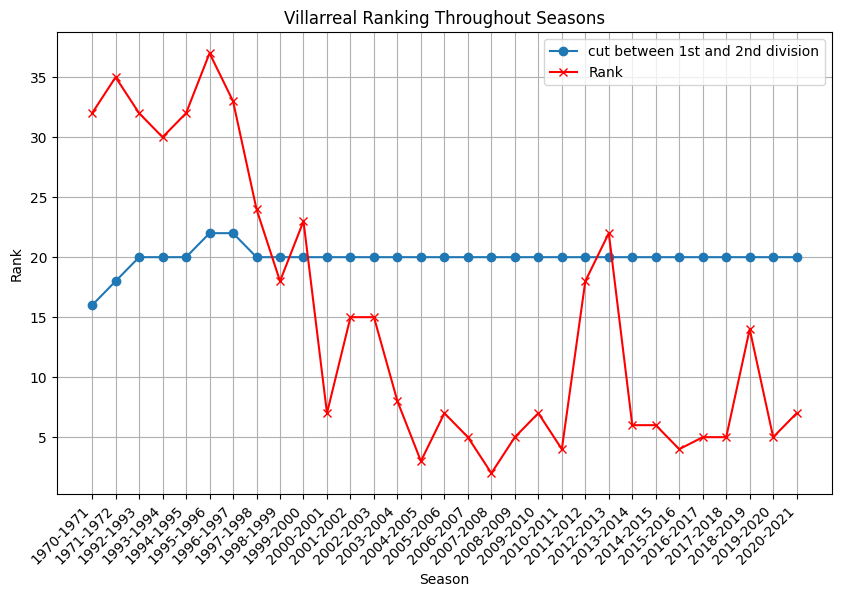

In [26]:
df_ex8 = result_ex7.copy()
df_maxdiv1 = df_ex8.groupby(['season', 'division'])['rank'].max().reset_index()
df_maxdiv1 = df_maxdiv1[df_maxdiv1['division'] == 1].rename(columns={'rank': 'max_div1'})
df_maxdiv1 = df_maxdiv1[['season', 'max_div1']]
df_ex8 = df_ex8.merge(df_maxdiv1, on = ['season'], how = 'left')
df_ex8['max_div1'] = df_ex8['max_div1'].fillna(0).astype(int)
df_ex8['rank_cont'] = np.where(df_ex8['division'] == 1, df_ex8['rank'], df_ex8['max_div1'] + df_ex8['rank'])
df_ex8 = df_ex8.sort_values(by=['season'], ascending=True)
villarreal_df = df_ex8[df_ex8['team'] == 'Villarreal']
# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the 'max_div1' column as a line
plt.plot(villarreal_df['season'], villarreal_df['max_div1'], marker='o', label='cut between 1st and 2nd division')
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Rank')
plt.title('Villarreal Ranking Throughout Seasons')

# Plot the 'rank' as points
plt.plot(villarreal_df['season'], villarreal_df['rank_cont'], color='red', label='Rank', marker='x')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
def plot_ranking_evolution(*teams):
    df = df_ex8[df_ex8['team'].isin(list(teams))][['season', 'team', 'rank_cont']]
    #df = df.sort_values(by=['season'], ascending=True)

    # Create a line plot for each 'team'
    plt.figure(figsize=(20, 10))

    plt.plot(df_ex8['season'], df_ex8['max_div1'], marker='o', label='cut between 1st and 2nd division')
    
    unique_teams = df['team'].unique()
    
    for team in unique_teams:
        team_data = df[df['team'] == team]
        plt.plot(team_data['season'], team_data['rank_cont'], label=team, marker='o')
    
    # Set labels and title
    plt.xlabel('Season')
    plt.ylabel('Rank')
    plt.title('Line Plot of Team Rankings Over Seasons')
    
    # Rotate x-axis labels for better readability
    plt.xticks(range(0, len(df['season'].unique()), 5), df['season'].unique()[::5], rotation=45, ha='right')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

## EJERCICIO 9

In [28]:
df_ex9 = result_ex7.copy()
df_grouped = df_ex9.groupby(['team', 'season'])['division'].first().reset_index()
df_grouped['division_change'] = df_grouped.groupby('team')['division'].diff().abs()

elevator_counts = df_grouped.groupby('team')['division_change'].sum()

TOP_5_elevator_teams = elevator_counts.sort_values(ascending=False).head(5).index.tolist()
TOP_5_elevator_teams

['Dep. La Coruña', 'Celta de Vigo', 'Racing', 'Real Murcia', 'Real Betis']

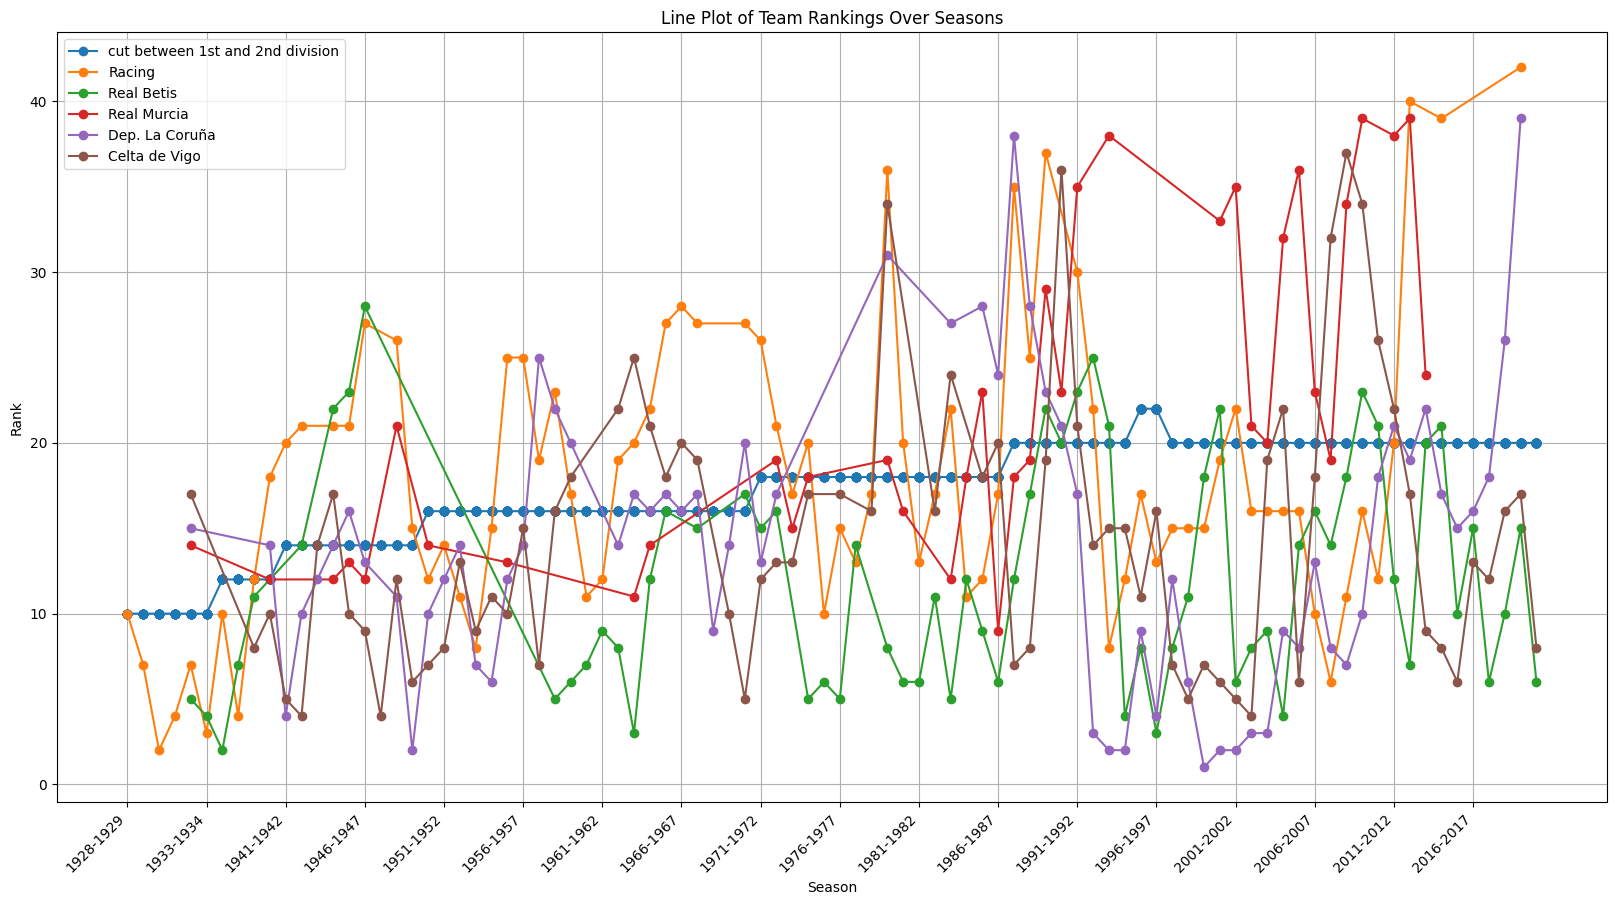

In [29]:
plot_ranking_evolution('Dep. La Coruña', 'Celta de Vigo', 'Racing', 'Real Murcia', 'Real Betis')